<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/DR3_TP1_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Instalção de Módulos**

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 5.2 MB/s 


#**Importação das bibliotecas básicas**

In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve,  ShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC

#**Aprendizagem baseada em instâncias - knn**

#**Carregamento da base de dados Smarket**

In [ ]:
base_smarket = pd.read_csv('/content/Smarket.csv')
base_smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


#**Exploração dos dados**

In [ ]:
base_smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [ ]:
base_smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [ ]:
base_smarket.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [ ]:
np.unique(base_smarket['Direction'], return_counts=True)

(array(['Down', 'Up'], dtype=object), array([602, 648]))

In [ ]:
base_smarket.index

RangeIndex(start=0, stop=1250, step=1)

#**Visualização dos dados**

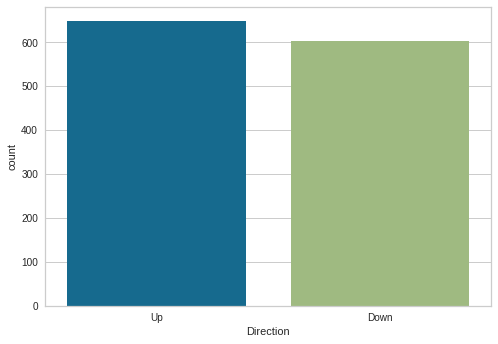

In [ ]:
sns.countplot(x = base_smarket['Direction']);

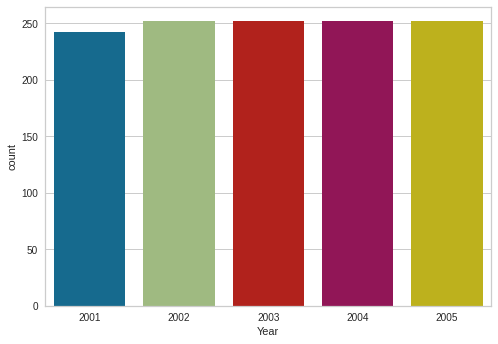

In [ ]:
sns.countplot(x = base_smarket['Year']);

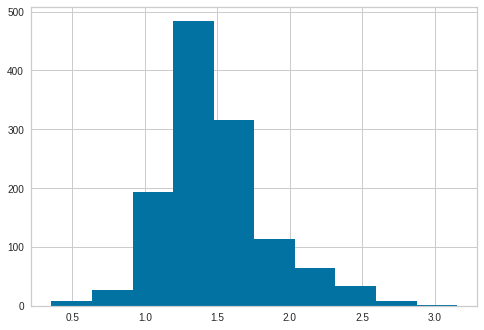

In [ ]:
plt.hist(x=base_smarket['Volume']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


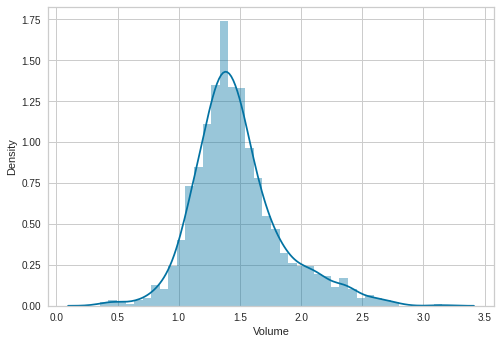

In [ ]:
sns.distplot(base_smarket['Volume'], hist = True, kde = True);

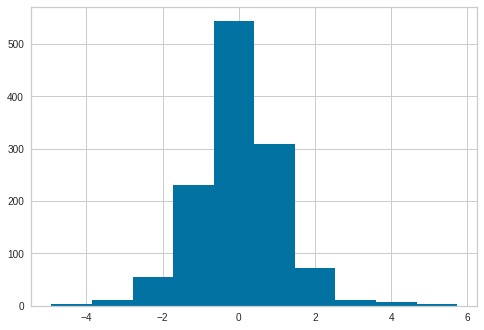

In [ ]:
plt.hist(x=base_smarket['Today']);

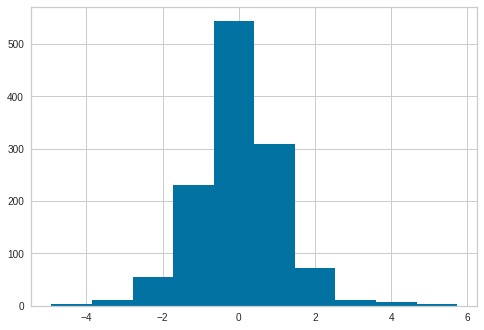

In [ ]:
plt.hist(x=base_smarket['Lag1']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


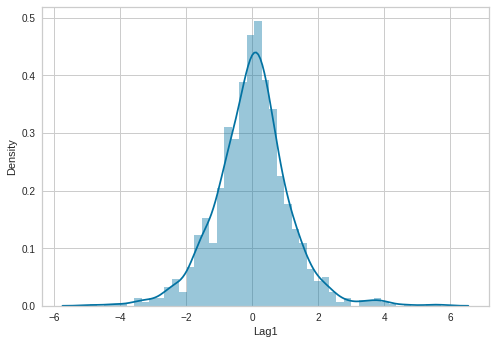

In [ ]:
sns.distplot(base_smarket['Lag1'], hist = True, kde = True);

In [ ]:
grafico = px.treemap(base_smarket, path=['Direction', 'Year'])
grafico.show()

#**Divisão entre previsores e classe - Ano: 2005**

In [ ]:
base_smarket_2005 = base_smarket[base_smarket['Year']==2005]
base_smarket_2005

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,Down
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,Down
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,Down
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,Up
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,Down
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [ ]:
X_base_smarket_teste = base_smarket_2005.iloc[:, 0:8].values
X_base_smarket_teste

array([[ 2.00500e+03, -1.34000e-01,  8.00000e-03, ..., -4.31000e-01,
         7.86900e-01, -8.12000e-01],
       [ 2.00500e+03, -8.12000e-01, -1.34000e-01, ...,  7.15000e-01,
         1.51080e+00, -1.16700e+00],
       [ 2.00500e+03, -1.16700e+00, -8.12000e-01, ..., -7.00000e-03,
         1.72100e+00, -3.63000e-01],
       ...,
       [ 2.00500e+03, -9.55000e-01,  4.30000e-02, ..., -2.40000e-02,
         1.54047e+00,  1.30000e-01],
       [ 2.00500e+03,  1.30000e-01, -9.55000e-01, ...,  2.52000e-01,
         1.42236e+00, -2.98000e-01],
       [ 2.00500e+03, -2.98000e-01,  1.30000e-01, ...,  4.22000e-01,
         1.38254e+00, -4.89000e-01]])

In [ ]:
y_base_smarket_teste = base_smarket_2005.iloc[:, 8].values
y_base_smarket_teste

array(['Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up'

In [ ]:
base_smarket_treinamento_handled = base_smarket[base_smarket['Year']!=2005]
base_smarket_treinamento_handled

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
...,...,...,...,...,...,...,...,...,...
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up


In [ ]:
X_base_smarket_treinamento = base_smarket_treinamento_handled.iloc[:, 0:8].values
X_base_smarket_treinamento

array([[ 2.0010e+03,  3.8100e-01, -1.9200e-01, ...,  5.0100e+00,
         1.1913e+00,  9.5900e-01],
       [ 2.0010e+03,  9.5900e-01,  3.8100e-01, ..., -1.0550e+00,
         1.2965e+00,  1.0320e+00],
       [ 2.0010e+03,  1.0320e+00,  9.5900e-01, ..., -2.6240e+00,
         1.4112e+00, -6.2300e-01],
       ...,
       [ 2.0040e+03,  7.1500e-01, -4.3100e-01, ...,  9.0400e-01,
         9.8300e-01, -7.0000e-03],
       [ 2.0040e+03, -7.0000e-03,  7.1500e-01, ...,  3.4200e-01,
         9.2590e-01,  8.0000e-03],
       [ 2.0040e+03,  8.0000e-03, -7.0000e-03, ...,  4.6000e-02,
         8.2980e-01, -1.3400e-01]])

In [ ]:
y_base_smarket_treinamento = base_smarket_treinamento_handled.iloc[:, 8].values
y_base_smarket_treinamento

array(['Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 

In [ ]:
X_base_smarket = base_smarket.iloc[:, 0:8].values
#X_base_smarket

In [ ]:
y_base_smarket = base_smarket.iloc[:, 8].values
#y_base_smarket

#**Divisão da base em treinamento e teste - Ano: 2005**

In [ ]:
#X_base_smarket_treinamento, X_base_smarket_teste, y_base_smarket_treinamento, y_base_smarket_teste = train_test_split(X_base_smarket, y_base_smarket, test_size = 0.30, random_state = 0)

In [ ]:
X_base_smarket_treinamento.shape, y_base_smarket_treinamento.shape

((998, 8), (998,))

In [ ]:
X_base_smarket_teste.shape, y_base_smarket_teste.shape

((252, 8), (252,))

#**Salvar as variáveis**

In [ ]:
with open('smarket.pkl', mode = 'wb') as f:
  pickle.dump([X_base_smarket_treinamento, y_base_smarket_treinamento, X_base_smarket_teste, y_base_smarket_teste], f)

#**Leitura das variáveis**

In [ ]:
with open('smarket.pkl', 'rb') as f:  
  X_base_smarket_treinamento, y_base_smarket_treinamento, X_base_smarket_teste, y_base_smarket_teste = pickle.load(f)

In [ ]:
X_base_smarket_treinamento.shape, y_base_smarket_treinamento.shape

((998, 8), (998,))

In [ ]:
X_base_smarket_teste.shape, y_base_smarket_teste.shape

((252, 8), (252,))

#**Criação do modelo**

In [ ]:
knn_smarket = KNeighborsClassifier(n_neighbors=20)
knn_smarket.fit(X_base_smarket_treinamento, y_base_smarket_treinamento)

KNeighborsClassifier(n_neighbors=20)

#**Predição**

In [ ]:
previsoes = knn_smarket.predict(X_base_smarket_teste)
previsoes

array(['Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Down', 'Down',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 

In [ ]:
y_base_smarket_teste

array(['Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up'

In [ ]:
accuracy_score(y_base_smarket_teste, previsoes)

0.9007936507936508

#**Visualização matriz de confusão**

0.9007936507936508

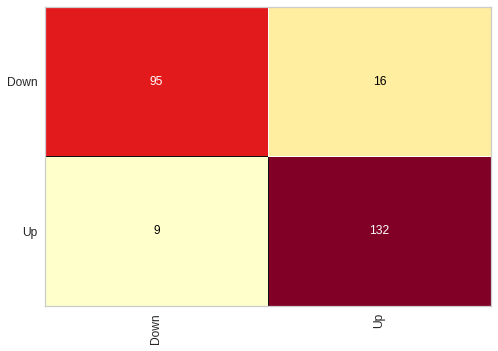

In [ ]:
cm = ConfusionMatrix(knn_smarket)
cm.fit(X_base_smarket_treinamento, y_base_smarket_treinamento)
cm.score(X_base_smarket_teste, y_base_smarket_teste)

#**Relatório de Métricas**

In [ ]:
print(classification_report(y_base_smarket_teste, previsoes))

              precision    recall  f1-score   support

        Down       0.91      0.86      0.88       111
          Up       0.89      0.94      0.91       141

    accuracy                           0.90       252
   macro avg       0.90      0.90      0.90       252
weighted avg       0.90      0.90      0.90       252



#**Função para exibir gráfico das Curvas de Aprendizagem.**

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
  
  if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
  print("Testando...")

  axes[0].set_title(title)
  if ylim is not None:
    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    return plt

#**Vizualização das Curvas de Aprendizagem**

Testando...
Testando...


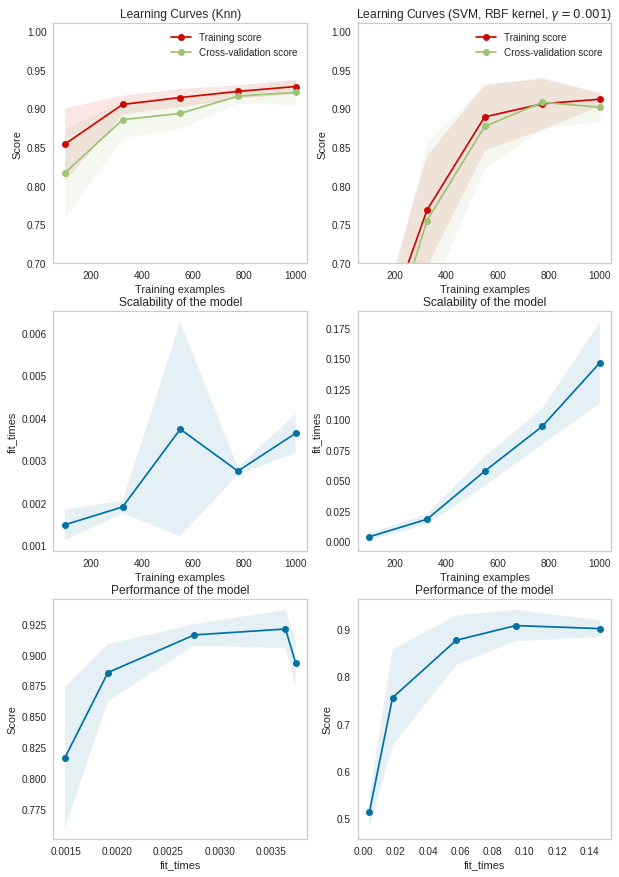

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Knn is more expensive so we do a lower number of Knn iterations:
title = "Learning Curves (Knn)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
knn_smarket = KNeighborsClassifier(n_neighbors=20)
plot_learning_curve(
    knn_smarket, title, X_base_smarket, y_base_smarket, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

# SVC is more expensive so we do a lower number of CV iterations:
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_base_smarket, y_base_smarket, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()